In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def perceptron(xs, ws):
    ys = np.sum(ws * xs, axis=1) > 0
    ys = ys.astype(float) * 2 - 1
    return ys

def linear_perceptron(xs, ws):
    ys = np.sum(ws * xs, axis=1)
    return ys

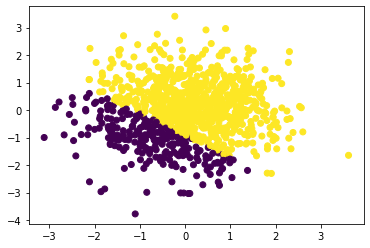

In [45]:
n = 1000
xs = np.ones((n, 3))
xs[:,1:] = np.random.multivariate_normal(mean = [0, 0], cov=np.eye(2), size = n)
ws = np.random.random(3)
ys = linear_perceptron(xs, ws)

plt.scatter(xs[:,1], xs[:,2], c=perceptron(xs, ws))

In [42]:
def mean_squared_error(ys, hat_ys):
    return np.mean((ys - hat_ys)**2)

mean_squared_error(ys, linear_perceptron(xs, ws))

0.0

0 1.2332439137412088
1 1.2209646673257852
2 1.2088091871708129
3 1.1967762178882027
4 1.1848645168736542
5 1.1730728541761322
6 1.1614000123686723
7 1.149844786420519
8 1.1384059835705616
9 1.12708242320207
10 1.1158729367187128
11 1.104776367421839
12 1.0937915703890206
13 1.0829174123538328
14 1.072152771586868
15 1.061496537777963
16 1.0509476119196353
17 1.0405049061917049
18 1.0301673438471066
19 1.0199338590988587
20 1.009803397008196
21 0.9997749133738442
22 0.9898473746224249
23 0.9800197576999858
24 0.9702910499646359
25 0.9606602490802818
26 0.9511263629114486
27 0.9416884094191783
28 0.9323454165579915
29 0.923096422173903
30 0.9139404739034813
31 0.904876629073939
32 0.8959039546042452
33 0.8870215269072503
34 0.8782284317928097
35 0.8695237643718999
36 0.8609066289617131
37 0.8523761389917246
38 0.8439314169107182
39 0.8355715940947641
40 0.8272958107561369
41 0.8191032158531647
42 0.8109929670009994
43 0.802964230383302
44 0.7950161806648265
45 0.7871480009049013
46 0.779

0.0

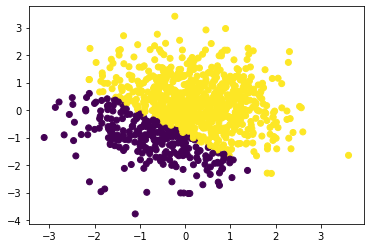

In [59]:
def gradient_descent(xs, ys, eta=0.000005, epochs=100):
    n_features = xs.shape[1]
    ws = np.random.random(n_features)/100 # initialize weights to a small random value

    hat_ys = linear_perceptron(xs, ws) # compute model
    error = mean_squared_error(ys, hat_ys)
    print(0, error)
    for epoch in range(epochs): # termination condition
        delta_ws = np.zeros(n_features) # initialize delta weights to zero
        for x, y in zip(xs, ys):
            hat_y = ws * x
            delta_ws = delta_ws + eta*(y - hat_y)*x
        ws = ws + delta_ws

        hat_ys = linear_perceptron(ws, xs) # compute model
        error = mean_squared_error(ys, hat_ys)
        print(epoch + 1, error)
    return ws

hat_ws = gradient_descent(xs, ys)
print(hat_ws)
plt.scatter(xs[:,1], xs[:,2], c=perceptron(xs, hat_ws))
mean_squared_error(ys, linear_perceptron(xs, hat_ws))
mean_squared_error(perceptron(xs, hat_ws), perceptron(xs, hat_ws))


In [87]:
mean_squared_error(ys, ys)

0.0